In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from pypalettes import load_cmap

names_to_keep = [
   'Python',
   'JavaScript',
   'Java',
   'TypeScript',
   'PHP',
   'C',
   'C++',
   'C#',
   'Go',
   'Lua',
   'Ruby',
   'Rust',
   'Swift',
   'Kotlin'
]

issues = pd.read_csv("issues.csv")
issues = issues.groupby(by=['name', 'year'])['count'].sum().reset_index()
issues = issues[issues['name'].isin(names_to_keep)]

prs = pd.read_csv("prs.csv")
prs = prs.groupby(by=['name', 'year'])['count'].sum().reset_index()
prs = prs[prs['name'].isin(names_to_keep)]

df = issues.merge(
   prs, on=['name', 'year'],
   how='inner',
   suffixes=['_issues', '_prs']
)
df = df[df['year']<2022]
df.head()

,name,year,count_issues,count_prs
0,C,2011,1276,623
1,C,2012,16423,14560
2,C,2013,44471,31661
3,C,2014,73609,64306
4,C,2015,114195,114149


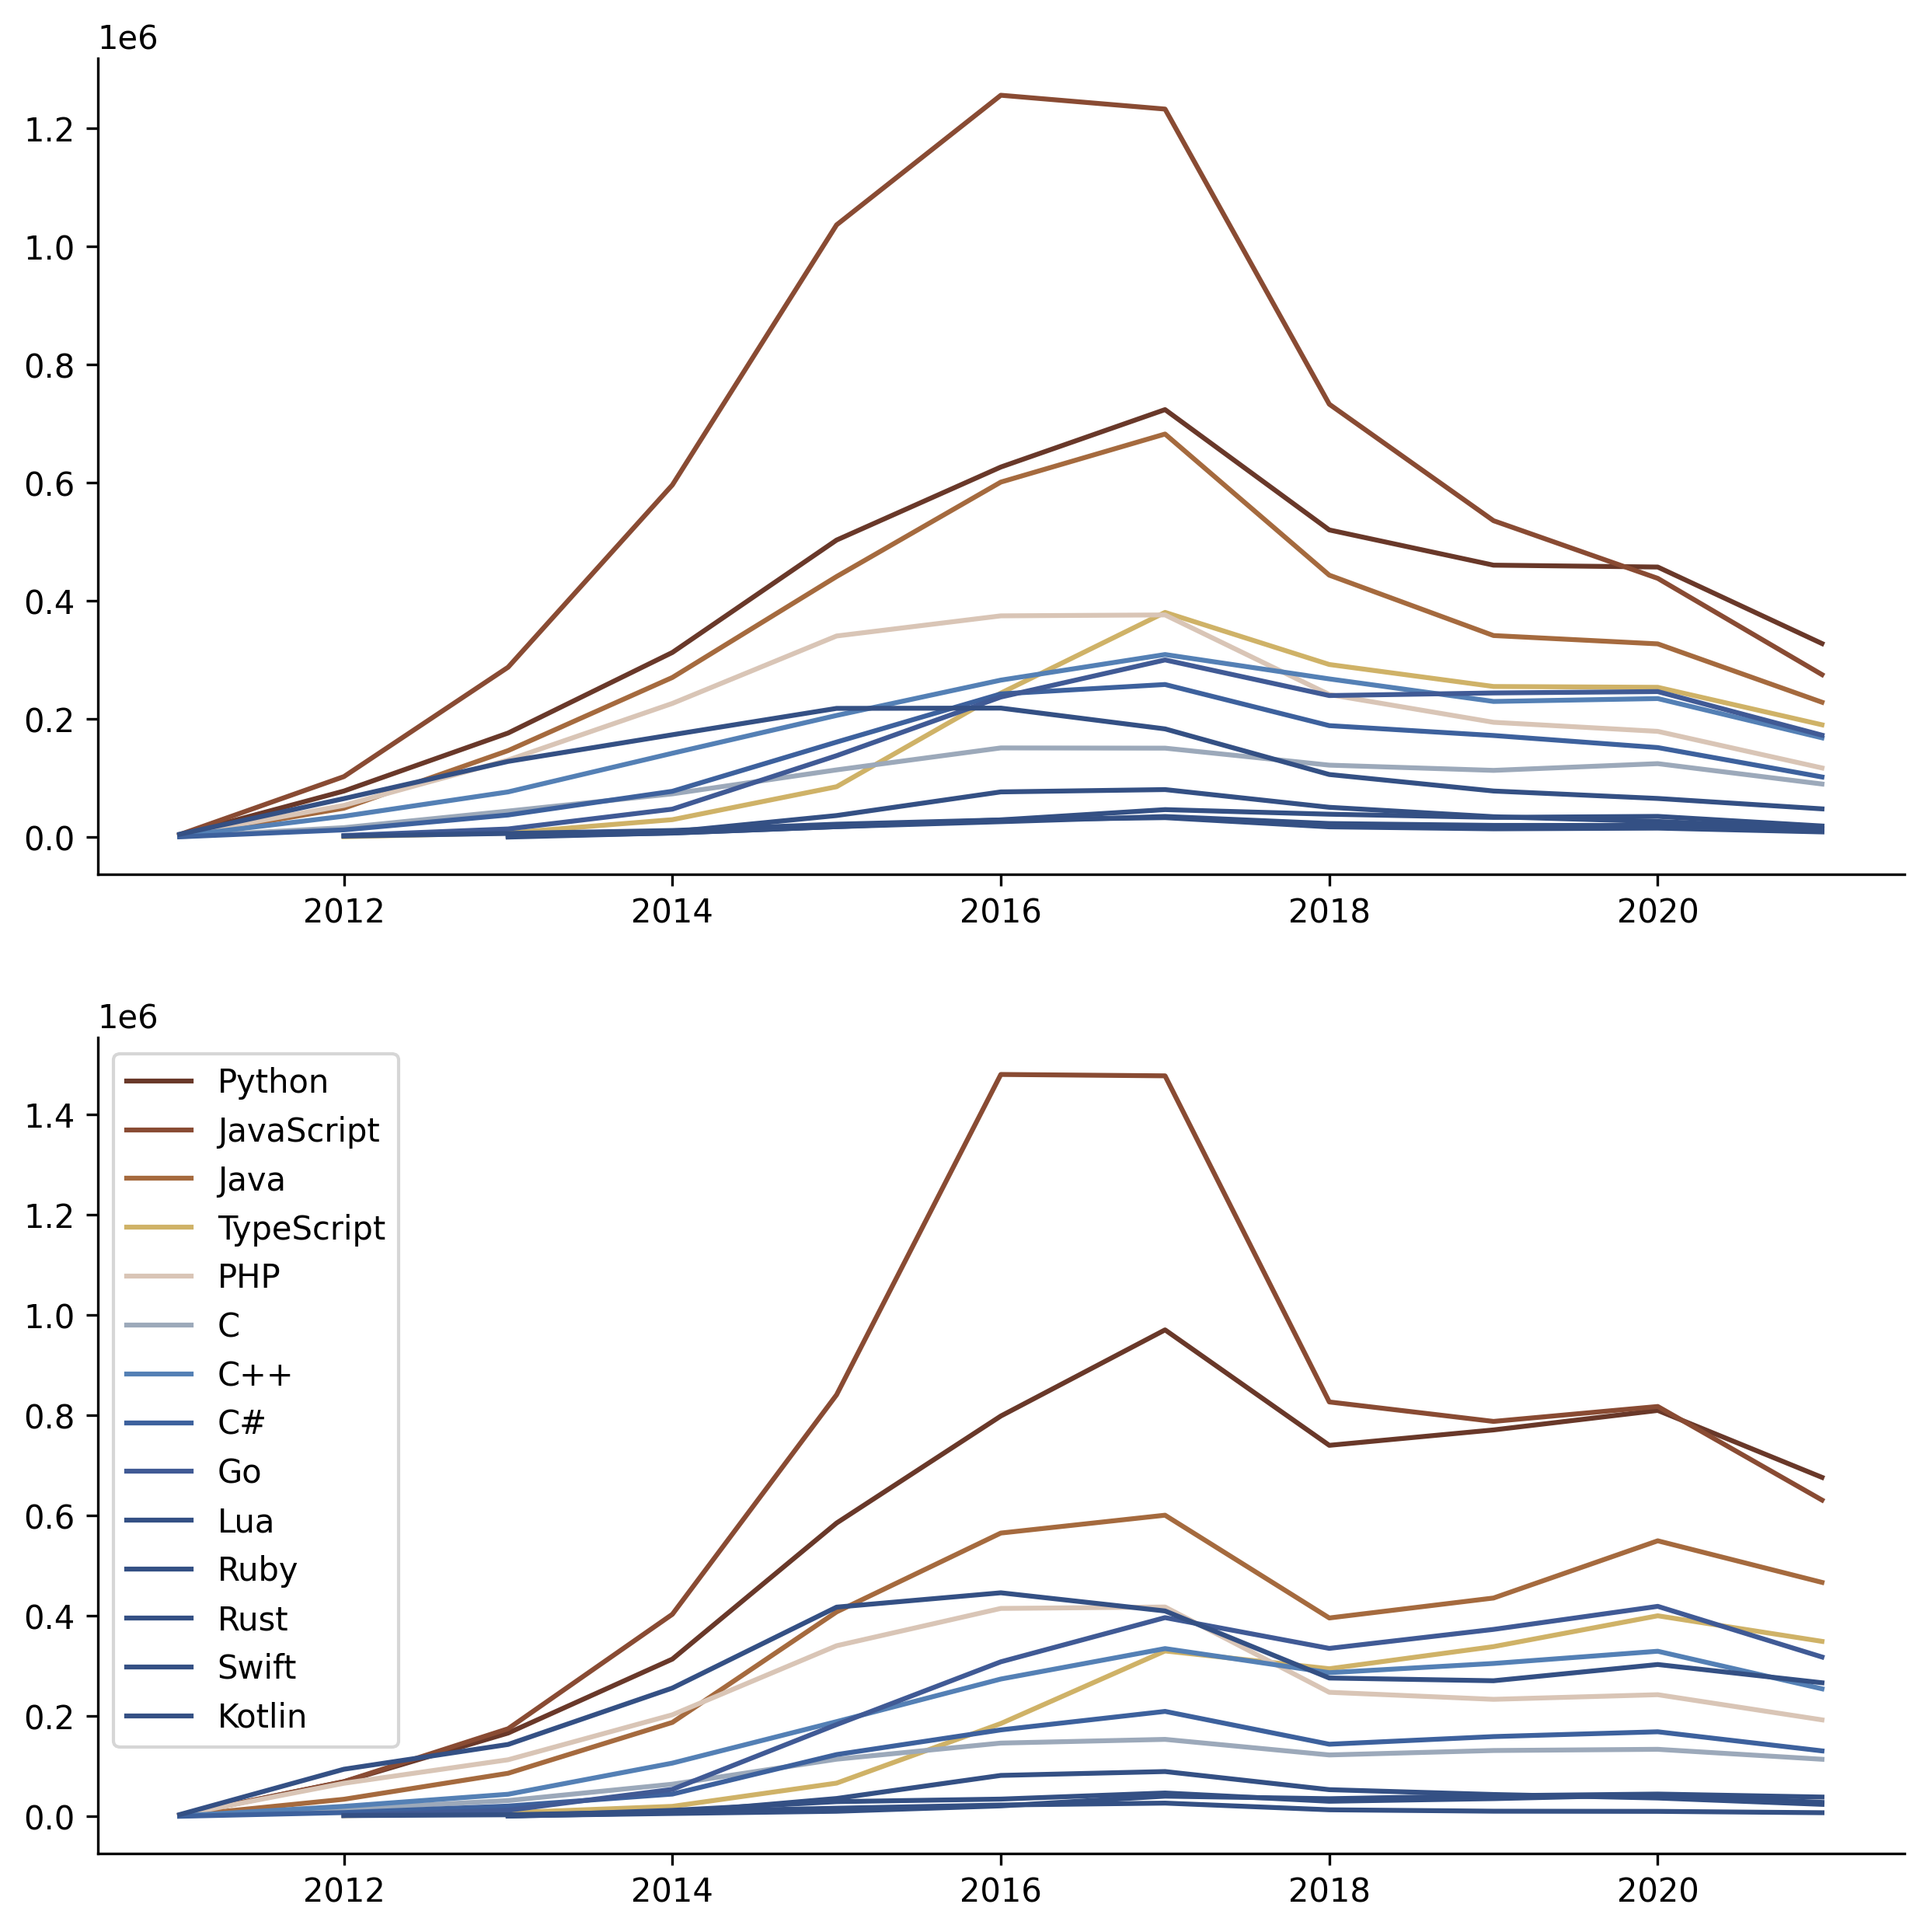

In [63]:
cmap = load_cmap("Alacena")

fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(10,10), dpi=300)

for i, name in enumerate(names_to_keep):
   subset = df[df['name']==name]
   axs[0].plot(subset['year'], subset['count_issues'], color=cmap(i), label=name)
   axs[1].plot(subset['year'], subset['count_prs'], color=cmap(i), label=name)

   for ax in axs:
      ax.spines[['top', 'right']].set_visible(False)

plt.legend()
plt.show()